<a href="https://colab.research.google.com/github/KuanChihLee/Supervised-Learning/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## This Assignment implement different loss functions and comparison.


# Question 4

#### (a) Overlay graphs of the loss functions, Quadratic loss (L_2 norm), Mean absolute error (L_1 norm) and Huber loss, for a range of e (consider two different values of δ for Huber loss). Use the graph to discuss the relative advantages and disadvantages of these loss functions for linear regression.

#### Answer:
#### 1. Differentiable: MSE and Huber loss function can, but MAE is not differentiable
#### 2. Robust to outliers: MAE and Huber loss function are better than MSE because MSE will square all the value of error

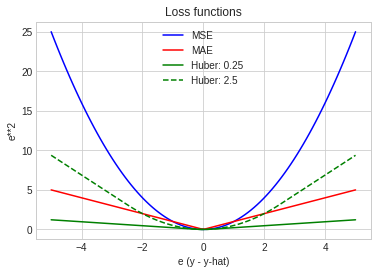

In [0]:
upper = 5
lower = -5
points = 100
err = np.linspace(lower, upper, points)

fig, ax = plt.subplots()

# Plot MSE and MAE
MSE = err**2
MAE = abs(err)

ax.plot(err, MSE, '-b', label='MSE')
ax.plot(err, MAE, '-r', label='MAE')

# Plot Huber loss
count = True
for delta in [0.25, 2.5]:
    H_loss_p1 = delta*( abs(err[err <= -delta]) - delta/2)
    H_loss_p2 = (err[abs(err) <= delta])**2/2
    H_loss_p3 = delta*( abs(err[err >= delta]) - delta/2)
    H_loss = np.zeros(points)
    H_loss[0:len(H_loss_p1)] = H_loss_p1
    H_loss[len(H_loss_p1):len(H_loss_p1)+len(H_loss_p2)] = H_loss_p2
    H_loss[len(H_loss_p1)+len(H_loss_p2):] = H_loss_p3
    if count:
        ax.plot(err, H_loss, '-g', label='Huber: ' + str(delta))
    else:
        ax.plot(err, H_loss, '--g', label='Huber: ' + str(delta))
    count = False
    
leg = ax.legend();
title = ax.set_title('Loss functions');
xlabel = ax.set_xlabel('e (y - y-hat)');
ylabel = ax.set_ylabel('e**2');

#### (b) Implement gradient descent for the loss functions above

#### (c) Implement stochastic gradient descent for the loss functions above

#### Here, the error reduced by gradient descent is shown. The real practice with generated data will be shown in the question 5.

In [0]:
# Original Function
def func(x, name, delta = 1.0):
    if name == 'MSE': 
        return np.square(x)
    elif name == 'MAE': 
        return abs(x)
    elif name == 'Huber':
        H_loss = np.zeros(len(x))
        i = 0
        for x in x:
            if abs(x) <= delta:
                H_loss[i] = np.square(x)/2
            else:
                H_loss[i] = delta*( abs(x) - delta/2)
            i += 1
        return H_loss
    
# Derivative Function    
def dfunc(x, name, delta):
    if name == 'MSE': 
        return 2 * x
    elif name == 'MAE':
        if x > 0:
            return 1
        elif x < 0:
            return -1
        else: 
            return 0
    elif name == 'Huber':
        if abs(x) <= delta:
            return x
        else:
            if x > 0: 
                return delta
            else: 
                return -delta
    
            
def GD(x_start, df, name, epochs, lr, delta = 1.0):
    '''
    Gradient Descent:
    para x_start: starting point of x
    para df: first order function of target function
    para epochs: how many times to update
    para lr: learning rate
    para delta: it's only used in function named Huber
    return: x_new, which is the new points after each epoch
    '''
    x_new = np.zeros(epochs + 1)
    x = x_start
    x_new[0] = x
    for i in range(epochs):
        dx = df(x, name, delta)
        v = -dx * lr
        x += v
        x_new[i+1] = x
    
    return x_new
    
x_start = 5   
epochs = 10
lr = 0.3

Text(0.5,1,'MSE')

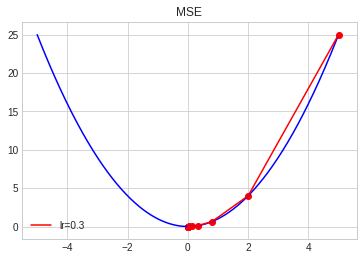

In [0]:
func_name = 'MSE'
x = GD(x_start, dfunc, func_name, epochs, lr=lr)

t = np.arange(-5.0, 5.0, 0.01)
plt.plot(t, func(t, func_name), c='b')
plt.plot(x, func(x, func_name), c='r', label='lr={}'.format(lr))
plt.scatter(x, func(x, func_name), c='r')
plt.legend()
plt.title('MSE')

Text(0.5,1,'MAE')

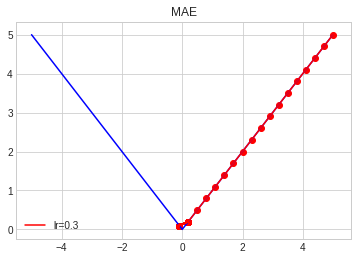

In [0]:
func_name = 'MAE'
epochs = 100

x = GD(x_start, dfunc, func_name, epochs, lr=lr)

t = np.arange(-5.0, 5.0, 0.01)
plt.plot(t, func(t, func_name), c='b')
plt.plot(x, func(x, func_name), c='r', label='lr={}'.format(lr))
plt.scatter(x, func(x, func_name), c='r')
plt.legend()
plt.title('MAE')

Text(0.5,1,'Huber Loss')

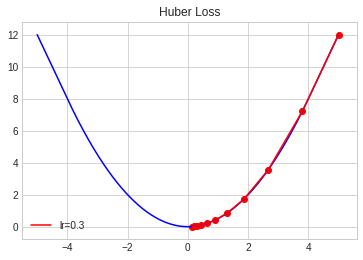

In [0]:
func_name = 'Huber'
epochs = 10
delta = 4.0
x = GD(x_start, dfunc, func_name, epochs, lr=lr, delta=delta)

t = np.arange(-5.0, 5.0, 0.01)
plt.plot(t, func(t, func_name, delta=delta), c='b')
plt.plot(x, func(x, func_name, delta=delta), c='r', label='lr={}'.format(lr))
plt.scatter(x, func(x, func_name, delta=delta), c='r')
plt.legend()
plt.title('Huber Loss')

# Question 5

#### In this question we will revisit JW Figure 3.3, and empirically evaluate various approaches to fitting linear regression.

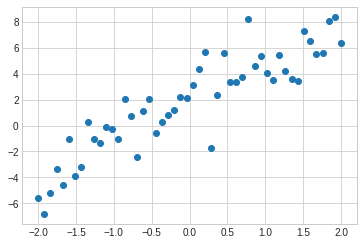

In [0]:
## Creating data required in question 5
S_Num = 50
Slope = 3
Inter = 2
Mean = 0
Std = 2
#rng = np.random.RandomState(42)
#x = 10 * rng.rand(S_Num)
es = np.random.normal(Mean, Std, S_Num)
x = np.linspace(-2, 2, S_Num)
y = Slope * x + Inter + es
plt.scatter(x, y)

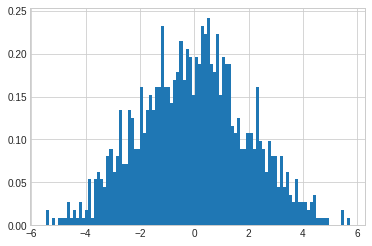

In [0]:
## Presenting errors are following Normal Distribution
s = np.random.normal(Mean, Std, 1000)
count, bins, ignored = plt.hist(s, 100, density=True)

Following cell is the loss function, which adjustable parameter for different gradient descent

In [0]:
import pandas as pd
from random import shuffle

X = pd.DataFrame({'Inter': np.ones(len(x))})
X['Slope'] = x

def loss_func(X, y, theta, name, delta):
    N, P = X.shape
    grad = np.zeros(P)
    err = X.dot(theta) - y 
    
    if name == 'MSE':
        J = sum(err ** 2.0) * (2.0/N)                              
        grad = X.T.dot(err) / N
    elif name == 'MAE':
        J = sum(abs(err)) / N
        for i in range(N):
            if err[i] > 0:
                grad += X[i,:].T
            elif err[i] < 0:
                grad -= X[i,:].T
            else: grad = grad
        grad /= N
    elif name == 'Huber':
        J = 0
        for i in range(N):
            if abs(err[i]) <= delta:
                J += err[i]**2 / 2
                grad += X[i].T.dot(err[i])
            else:
                J += delta * (abs(err[i]) - delta/2)
                if err[i] > 0:
                    grad += X[i,:].T * delta
                elif err[i] < 0:
                    grad -= X[i,:].T * delta
                else: grad = grad
        J /= N
        grad /= N

    return J, grad

def optimizer_func(X, y, batch, theta, name, alpha, max_iter, delta=1.0):
    N, P = X.shape
    order = np.array(range(N))
    X_shuffle = np.zeros((1,P))
    for i in range(max_iter):
        if batch:
            X_input = X.values
            J, grad = loss_func(X_input, y, theta, name, delta)
        else:
            shuffle(order)
            for i in range(P):
                X_shuffle[0,i] = X.iloc[order[0],i]
            y_shuffle = y[order]
            J, grad = loss_func(X_shuffle, y_shuffle[0], theta, name, delta)
        theta = theta - alpha*grad
    return theta

def analytic_solu(x, y, N):
    xmean = sum(x) / N
    ymean = sum(y) / N
    
    Sxx = sum((x - xmean) ** 2)
    Syy = sum((y - ymean) ** 2)
    Sxy = sum((x - xmean) * (y - ymean))
    
    theta = [ymean - Sxy/Sxx*xmean, Sxy/Sxx]
    return theta

In [0]:
## Here is Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
X_new = x[:, np.newaxis]
model.fit(X,y)
print(model.coef_, model.intercept_)

[0.         2.88915571] 1.8451106639377564


Estimated slope = 2.890,  intercept = 1.845;    Designed function with out noise: slope = 3.0,   intercept = 2.0

#### (a) Simulate N=50 values of X i , distributed Uniformly on interval (-2,2). Simulate the values of Y i = 2 + 3X i + e i , where e i is drawn from N (0, 4). Fit linear regression with squared loss to the simulated data using (i) analytical solution, (ii) gradient descent, and (iii) batch gradient descent implemented in Question 4. Set learning rate α to a small value (say, α = 0.01).

(i) analytical solution

In [0]:
theta = analytic_solu(x, y, S_Num)
print("parameters:\n" + "Intercept: " + str(theta[0]) + '\n' + "Slope: " + str(theta[1]))

parameters:
Intercept: 1.8451106639377564
Slope: 2.8891557071344587


(ii) & (iii) gradient descent

Stochastic and batch gradient descent can be switched with parameter "batch"

In [0]:
alpha = 0.01
max_iter = 1000
theta_init = [0,0]
batch = True             # batch = False, is stochastic GD
loss_func_name = 'MSE'   # Here I use Mean Squared Error as loss function
theta = optimizer_func(X, y, batch, theta_init, loss_func_name, alpha, max_iter)
print("parameters:\n" + "Intercept: " + str(theta[0]) + '\n' + "Slope: " + str(theta[1]))
print("GD error:" + str(sum((X.dot(theta) - y) ** 2.0) * (2.0/S_Num)))

parameters:
Intercept: 1.8450310082087833
Slope: 2.889153243271589
GD error:5.429529647373626


#### (b) Repeat (a) 1,000 times, overlay the histograms of the estimates of the slopes, and overlay the true value. Comment on how the choice of the algorithm affects the estimates of the slope parameter.

#### Answer:
#### For the case using MSE as loss function, I got a similar result of slopes between batch and stochastic gradient descent. But, the standard deviation of stochastic gradient descent (std = 0.274) is slightly larger than the one using batch gradient descent (std = 0.254). This means that stochastic gradient descent will cause a larger variance error in this case.

Using batch gradient descent

Mean:  2.988370823131351
Std:  0.25430741574700344
Min:  2.1905807665887225
25%:  2.8132204028459418
50%:  2.989653350559874
75%:  3.1643497107757566
Max:  3.8182923850011727


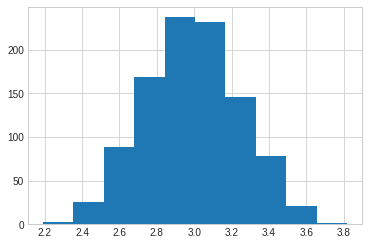

In [0]:
repeat_times = 1000
x = np.linspace(-2, 2, S_Num)
slopes = np.zeros(repeat_times)
for i in range(repeat_times):
    es = np.random.normal(Mean, Std, S_Num)
    y_new = Slope * x + Inter + es
    theta_init = [0,0]
    batch = True
    loss_func_name = 'MSE'
    theta = optimizer_func(X, y_new, batch, theta_init, loss_func_name, alpha, max_iter)
    slopes[i] = theta[1]
    
plt.hist(slopes)
print("Mean: ", slopes.mean())
print("Std: ", slopes.std())
print("Min: ", slopes.min())
print("25%: ", np.percentile(slopes, 25))
print("50%: ", np.percentile(slopes, 50))
print("75%: ", np.percentile(slopes, 75))
print("Max: ", slopes.max())

Using stochastic gradient descent

Mean:  3.0118426031029175
Std:  0.27481515585697563
Min:  2.1107374722465067
25%:  2.832995737022755
50%:  3.028614337917065
75%:  3.1879977224654907
Max:  3.942989964184504


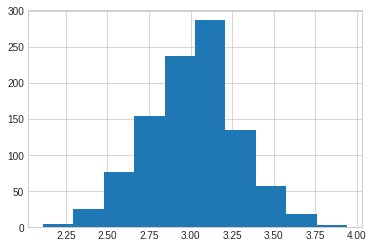

In [0]:
for i in range(repeat_times):
    es = np.random.normal(Mean, Std, S_Num)
    y_new = Slope * x + Inter + es
    theta_init = [0,0]
    batch = False
    loss_func_name = 'MSE'
    theta = optimizer_func(X, y_new, batch, theta_init, loss_func_name, alpha, max_iter)
    slopes[i] = theta[1]
    
plt.hist(slopes)
print("Mean: ", slopes.mean())
print("Std: ", slopes.std())
print("Min: ", slopes.min())
print("25%: ", np.percentile(slopes, 25))
print("50%: ", np.percentile(slopes, 50))
print("75%: ", np.percentile(slopes, 75))
print("Max: ", slopes.max())

#### (c) Simulate N=50 values of X i , distributed Uniformly on interval (-2,2). Simulate the values of Y i = 2+3X i +e i , where e i is drawn from N (0, 4). Fit linear regression with (i) squared loss with the analytical solution, (ii) mean absolute error with gradient descent, and (iii) Huber loss with gradient descent implemented in Question 4. Set learning rate α to a small value (say, α = 0.01).

Remind: Designed slope = 3.0, intercept = 2.0

(i) MSE with analytical solution

In [0]:
theta = analytic_solu(x, y, S_Num)
print("parameters:\n" + "Intercept: " + str(theta[0]) + '\n' + "Slope: " + str(theta[1]))

parameters:
Intercept: 1.8451106639377564
Slope: 2.8891557071344587


(ii) MAE + batch GD

In [0]:
alpha = 0.01
max_iter = 1000
theta_init = [0,0]
batch = True             # batch = False, is stochastic GD
loss_func_name = 'MAE'   # Here I use Mean Absolute Error as loss function
theta = optimizer_func(X, y, batch, theta_init, loss_func_name, alpha, max_iter)
print("parameters:\n" + "Intercept: " + str(theta[0]) + '\n' + "Slope: " + str(theta[1]))
print("GD error:" + str(sum(abs(X.dot(theta) - y)) / S_Num))

parameters:
Intercept: 1.8143999999999945
Slope: 2.915559183673455
GD error:1.2877983918690226


(iii) Huber loss + batch GD

In [0]:
alpha = 0.01
max_iter = 1000
theta_init = [0,0]
batch = True              # batch = False, is stochastic GD
delta = 2.5               # adjusible delta
loss_func_name = 'Huber'  # Here I use Huber Loss as loss function
theta = optimizer_func(X, y, batch, theta_init, loss_func_name, alpha, max_iter, delta)
print("parameters:\n" + "Intercept: " + str(theta[0]) + '\n' + "Slope: " + str(theta[1]))

parameters:
Intercept: 1.8471151612026624
Slope: 2.858331308855216


#### (d) Repeat (c) 1,000 times, overlay the histograms of the estimates of the slopes, and overlay the true value. Comment on how the choice of the loss function in the case of Normal distribution affects the estimates of the slope parameter.

#### Answer: 
#### With same gradient descent method (batch gradient descent), all loss functions have a similar result. But, MSE and Huber loss have smaller standard deviation of slopes (0.241 and 0.242) than MAE has (std = 0.288). It makes sense that this Huber loss has similar performance as MSE because I gave it a higher delta (2.5).

Remind: Designed slope = 3.0, intercept = 2.0

(i) MSE + batch GD

Mean:  2.9929063597276144
Std:  0.24063624985248958
Min:  2.1775498330341754
25%:  2.8360532327226653
50%:  2.997445769235198
75%:  3.148266198437699
Max:  3.811166813831145


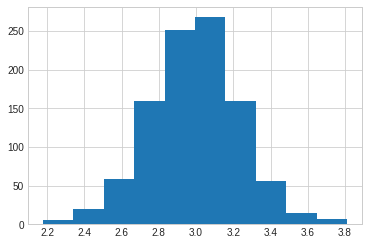

In [0]:
repeat_times = 1000
x = np.linspace(-2, 2, S_Num)
slopes = np.zeros(repeat_times)
for i in range(repeat_times):
    es = np.random.normal(Mean, Std, S_Num)
    y_new = Slope * x + Inter + es
    theta_init = [0,0]
    batch = True
    loss_func_name = 'MSE'
    theta = optimizer_func(X, y_new, batch, theta_init, loss_func_name, alpha, max_iter)
    slopes[i] = theta[1]
    
plt.hist(slopes)
print("Mean: ", slopes.mean())
print("Std: ", slopes.std())
print("Min: ", slopes.min())
print("25%: ", np.percentile(slopes, 25))
print("50%: ", np.percentile(slopes, 50))
print("75%: ", np.percentile(slopes, 75))
print("Max: ", slopes.max())

(ii) MAE + batch GD

Mean:  2.934161028571428
Std:  0.2878351466872439
Min:  1.937485714285751
25%:  2.744946938775511
50%:  2.935077551020476
75%:  3.136787755102039
Max:  3.8650938775510735


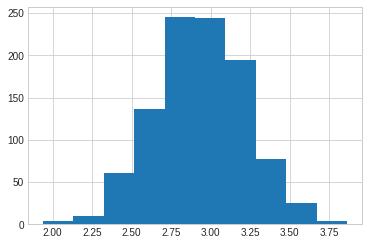

In [0]:
repeat_times = 1000
x = np.linspace(-2, 2, S_Num)
slopes = np.zeros(repeat_times)
for i in range(repeat_times):
    es = np.random.normal(Mean, Std, S_Num)
    y_new = Slope * x + Inter + es
    theta_init = [0,0]
    batch = True
    loss_func_name = 'MAE'
    theta = optimizer_func(X, y_new, batch, theta_init, loss_func_name, alpha, max_iter)
    slopes[i] = theta[1]
    
plt.hist(slopes)
print("Mean: ", slopes.mean())
print("Std: ", slopes.std())
print("Min: ", slopes.min())
print("25%: ", np.percentile(slopes, 25))
print("50%: ", np.percentile(slopes, 50))
print("75%: ", np.percentile(slopes, 75))
print("Max: ", slopes.max())

(iii) Huber loss + batch GD

Mean:  2.9847789644180076
Std:  0.2424340408481533
Min:  1.8987893795383253
25%:  2.8234893887429164
50%:  2.977145765959535
75%:  3.1386318070211576
Max:  4.046692509254027


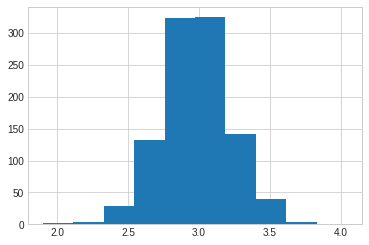

In [0]:
repeat_times = 1000
x = np.linspace(-2, 2, S_Num)
slopes = np.zeros(repeat_times)
for i in range(repeat_times):
    es = np.random.normal(Mean, Std, S_Num)
    y_new = Slope * x + Inter + es
    theta_init = [0,0]
    batch = True
    loss_func_name = 'Huber'
    theta = optimizer_func(X, y_new, batch, theta_init, loss_func_name, alpha, max_iter, delta = 2.5)
    slopes[i] = theta[1]
    
plt.hist(slopes)
print("Mean: ", slopes.mean())
print("Std: ", slopes.std())
print("Min: ", slopes.min())
print("25%: ", np.percentile(slopes, 25))
print("50%: ", np.percentile(slopes, 50))
print("75%: ", np.percentile(slopes, 75))
print("Max: ", slopes.max())

#### (e) Simulate N=50 values of X i , distributed Uniformly on interval (-2,2). Simulate the values of Y i = 2 + 3X i + e i , where e i is drawn from N (0, 4). Modify the simulated values of Y to introduce outliers, as follows. With probability 0.1, select an observation for modification. If it is selected, increase its value by 50% with probability 0.5, and decrease its value by 50% with probability 0.5. Fit linear regression to the modified data, with (i) squared loss with the analytical solution, (ii) mean absolute error with gradient descent, and (iii) Huber loss with gradient descent implemented in Question 4. Set learning rate α to a small value (say, α = 0.01).

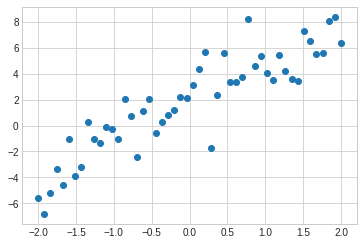

In [0]:
## Creating data
from math import ceil, floor
S_Num = 50
Slope = 3
Inter = 2
Mean = 0
Std = 2
#rng = np.random.RandomState(42)
#x = 10 * rng.rand(S_Num)
es = np.random.normal(Mean, Std, S_Num)
x = np.linspace(-2, 2, S_Num)
order = np.array(range(S_Num))
shuffle(order)
picked_idx_front = order[0:floor(0.1*S_Num/2)]
picked_idx_back = order[floor(0.1*S_Num/2):round(0.1*S_Num)]
y2 = Slope * x + Inter + es
for idx in picked_idx_front:
    y2[idx] *= 1.5
for idx in picked_idx_back:
    y2[idx] *= 0.5
plt.scatter(x, y)

(i) MSE with analytical solution

In [0]:
theta = analytic_solu(x, y2, S_Num)
print("parameters:\n" + "Intercept: " + str(theta[0]) + '\n' + "Slope: " + str(theta[1]))

parameters:
Intercept: 2.4017730217120916
Slope: 2.9960576338408598


(ii) MAE + batch GD

In [0]:
alpha = 0.01
max_iter = 1000
theta_init = [0,0]
batch = True             # batch = False, is stochastic GD
loss_func_name = 'MAE'   # Here I use Mean Absolute Error as loss function
theta = optimizer_func(X, y2, batch, theta_init, loss_func_name, alpha, max_iter)
print("parameters:\n" + "Intercept: " + str(theta[0]) + '\n' + "Slope: " + str(theta[1]))

parameters:
Intercept: 2.1951999999999843
Slope: 2.936261224489838


(iii) Huber loss + batch GD

In [0]:
alpha = 0.01
max_iter = 1000
theta_init = [0,0]
batch = True              # batch = False, is stochastic GD
delta = 2.5               # adjusible delta
loss_func_name = 'Huber'  # Here I use Huber Loss as loss function
theta = optimizer_func(X, y2, batch, theta_init, loss_func_name, alpha, max_iter, delta)
print("parameters:\n" + "Intercept: " + str(theta[0]) + '\n' + "Slope: " + str(theta[1]))

parameters:
Intercept: 2.4875150285962127
Slope: 3.0550047174952684


Linear Regression model from sklearn

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
X_new = x[:, np.newaxis]
model.fit(X,y2)
print(model.coef_, model.intercept_)

[0.         2.99605763] 2.4017730217120925


#### (f) Repeat (e) 1,000 times, overlay the histograms of the estimates of the slopes, and overlay the true value. Comment on how the choice of the loss function in presence of outliers affects the estimates of the slope parameter.

#### Answer:
#### The result shows that both loss functions are converged, but Huber loss function has higher quality for its linear regression result (because it has smaller standard deviation than MAE has). This result provides the simliar idea mentioned in question 5(b), the parameters variance is smaller when we use Huber or MSE as a loss function.

Remind: Designed slope = 3.0, intercept = 2.0

(i) MAE + batch GD

Mean:  2.861802155102041
Std:  0.2922568804220398
Min:  1.9129469387755063
25%:  2.669424489795886
50%:  2.863257142857187
75%:  3.058008163265322
Max:  3.8480816326530687


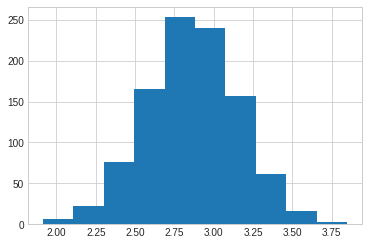

In [0]:
repeat_times = 1000
x = np.linspace(-2, 2, S_Num)
slopes = np.zeros(repeat_times)
for i in range(repeat_times):
    es = np.random.normal(Mean, Std, S_Num)
    order = np.array(range(S_Num))
    shuffle(order)
    picked_idx_front = order[0:floor(0.1*S_Num/2)]
    picked_idx_back = order[floor(0.1*S_Num/2):round(0.1*S_Num)]
    y_new2 = Slope * x + Inter + es
    for idx in picked_idx_front:
        y_new2[idx] *= 1.5
    for idx in picked_idx_back:
        y_new2[idx] *= 0.5
    theta_init = [0,0]
    batch = True
    loss_func_name = 'MAE'
    theta = optimizer_func(X, y_new2, batch, theta_init, loss_func_name, alpha, max_iter)
    slopes[i] = theta[1]
    
plt.hist(slopes)
print("Mean: ", slopes.mean())
print("Std: ", slopes.std())
print("Min: ", slopes.min())
print("25%: ", np.percentile(slopes, 25))
print("50%: ", np.percentile(slopes, 50))
print("75%: ", np.percentile(slopes, 75))
print("Max: ", slopes.max())

(ii) Huber loss + batch GD

Mean:  2.960657258133352
Std:  0.2548702311493833
Min:  2.225805575915907
25%:  2.781674882510974
50%:  2.9615389238697967
75%:  3.1358115282521526
Max:  3.6672385549942215


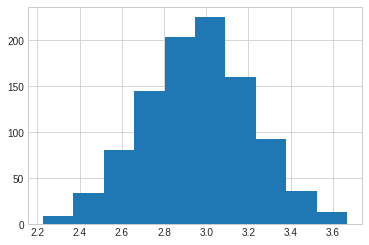

In [0]:
repeat_times = 1000
x = np.linspace(-2, 2, S_Num)
slopes = np.zeros(repeat_times)
for i in range(repeat_times):
    es = np.random.normal(Mean, Std, S_Num)
    order = np.array(range(S_Num))
    shuffle(order)
    picked_idx_front = order[0:floor(0.1*S_Num/2)]
    picked_idx_back = order[floor(0.1*S_Num/2):round(0.1*S_Num)]
    y_new2 = Slope * x + Inter + es
    for idx in picked_idx_front:
        y_new2[idx] *= 1.5
    for idx in picked_idx_back:
        y_new2[idx] *= 0.5
    theta_init = [0,0]
    batch = True
    loss_func_name = 'Huber'
    theta = optimizer_func(X, y_new2, batch, theta_init, loss_func_name, alpha, max_iter, delta = 2.5)
    slopes[i] = theta[1]
    
plt.hist(slopes)
print("Mean: ", slopes.mean())
print("Std: ", slopes.std())
print("Min: ", slopes.min())
print("25%: ", np.percentile(slopes, 25))
print("50%: ", np.percentile(slopes, 50))
print("75%: ", np.percentile(slopes, 75))
print("Max: ", slopes.max())